# STT AI - Lab Assignment 5: Data Augmentation

Team 25  

Name	| Roll Number
---|---
Romit Mohane|	23110279
Rudra Pratap Singh	|23110281

The goal of this assignment is to apply data augmentation techniques to improve the performance of an image classification model that distinguishes between cats and dogs.


In [1]:
!pip install gdown

In [2]:
!gdown "1SHEMUKg-GV8QBJr9p9OvwmY1cpbuIVYd"

Downloading...
From: https://drive.google.com/uc?id=1SHEMUKg-GV8QBJr9p9OvwmY1cpbuIVYd
To: /content/test.zip
100% 15.1M/15.1M [00:00<00:00, 58.2MB/s]


In [3]:
!pip install augly[image]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 24.0 MB/s eta 0:00:00
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31528 sha256=c08071c2cce429be0808b103a30715d3f4116a7e5fef0957a7e2e84df3887909
  Stored in directory: /root/.cache/pip/wheels/9a/a3/b6/ac0fcd1b4ed5cfeb3db92e6a0e476cfd48ed0df92b91080c1d
Successfully built iopath
  Attempting uninstall: Pillow
    Found existing installation: pillow 11.0.0
    Uninstalling pillow-11.0.0:
      Successfully uninstalled pillow-11.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.18 requires pillow>=9.0.0, but you have pillow 8.4.0 which is incompatible.
google-genai 0.3.0 req

## Task 1: Data Augmentation

Download the Cat & Dog Dataset (https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification?select=test) (Only download the test dataset; do not take the training dataset)  
The test dataset contains 70 images of cats and 70 images of dogs

In [4]:
!unzip -o test.zip

Archive:  test.zip
   creating: cats/
  inflating: cats/cat_190.jpg        
  inflating: __MACOSX/cats/._cat_190.jpg  
  inflating: cats/cat_147.jpg        
  inflating: __MACOSX/cats/._cat_147.jpg  
  inflating: cats/cat_542.jpg        
  inflating: __MACOSX/cats/._cat_542.jpg  
  inflating: cats/cat_595.jpg        
  inflating: __MACOSX/cats/._cat_595.jpg  
  inflating: cats/cat_422.jpg        
  inflating: __MACOSX/cats/._cat_422.jpg  
  inflating: cats/cat_583.jpg        
  inflating: __MACOSX/cats/._cat_583.jpg  
  inflating: cats/cat_384.jpg        
  inflating: __MACOSX/cats/._cat_384.jpg  
  inflating: cats/cat_586.jpg        
  inflating: __MACOSX/cats/._cat_586.jpg  
  inflating: cats/cat_545.jpg        
  inflating: __MACOSX/cats/._cat_545.jpg  
  inflating: cats/cat_223.jpg        
  inflating: __MACOSX/cats/._cat_223.jpg  
  inflating: cats/cat_551.jpg        
  inflating: __MACOSX/cats/._cat_551.jpg  
  inflating: cats/cat_587.jpg        
  inflating: __MACOSX/cats/._cat_

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import random
from sklearn.model_selection import train_test_split

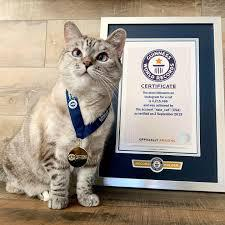

In [2]:
cv2_imshow(cv2.imread('cats/'+os.listdir('cats')[0]))

Let `0`: cat and
    `1`: dog

In [3]:
image_list = []
image_label = []

for image in os.listdir('cats'):
  image_path = os.path.join('cats', image)
  image_content = cv2.imread(image_path)
  image_list.append(image_content)
  image_label.append(0)

for image in os.listdir('dogs'):
  image_path = os.path.join('dogs', image)
  image_content = cv2.imread(image_path)
  image_list.append(image_content)
  image_label.append(1)

In [4]:
image_list[120], image_label[120]

(array([[[ 26,  54,  41],
         [ 25,  53,  40],
         [ 25,  51,  38],
         ...,
         [ 38,  52,  34],
         [ 37,  48,  32],
         [ 36,  47,  31]],
 
        [[ 23,  51,  38],
         [ 22,  50,  37],
         [ 22,  48,  35],
         ...,
         [ 36,  50,  32],
         [ 35,  46,  30],
         [ 35,  46,  30]],
 
        [[ 19,  47,  34],
         [ 18,  46,  33],
         [ 18,  44,  31],
         ...,
         [ 35,  49,  31],
         [ 35,  46,  30],
         [ 34,  45,  29]],
 
        ...,
 
        [[ 43,  31,  27],
         [ 41,  29,  25],
         [ 40,  28,  24],
         ...,
         [171, 190, 205],
         [171, 190, 205],
         [170, 189, 204]],
 
        [[ 44,  32,  28],
         [ 42,  30,  26],
         [ 40,  28,  24],
         ...,
         [173, 192, 207],
         [172, 191, 206],
         [171, 190, 205]],
 
        [[ 43,  31,  27],
         [ 41,  29,  25],
         [ 39,  27,  23],
         ...,
         [174, 193, 208],
  

In [5]:
# create 80:20 train test split on image_list
X_train, X_test, y_train, y_test = train_test_split(image_list, image_label, test_size=0.2, random_state=42)

train_cats = sum(1 for label in y_train if label == 0)
train_dogs = sum(1 for label in y_train if label == 1)
train_cats, train_dogs

(56, 56)

In [6]:
len(X_test)

28

In [7]:
# Create Custom Function using Augly which will perform multiple random data
# augmentation according to input. (At least 10 data augmentation needs to be
# added like rotate, cropping, blur …

from augly.image import aug_np_wrapper, blur, brightness, color_jitter, contrast, crop, grayscale, meme_format, pixelization, saturation, shuffle_pixels, skew, overlay_emoji

# Create a function that performs multiple data augmentations on a list of images
def augment_images(images, augumentations):
    print("Calling augment_images function")
    augmented_images = []

    for image in images:
        augmented_image = image.copy()  # work on a copy to preserve the original
        for augumentation in augumentations:
            if augumentation == 'blur':
                print("Applying blur")
                augmented_image = aug_np_wrapper(augmented_image, blur, **{'radius': 2})

            if augumentation == 'brightness':
                print("Applying brightness")
                augmented_image = aug_np_wrapper(augmented_image, brightness, **{'factor': 1.8})

            if augumentation == 'color_jitter':
                print("Applying color jitter")
                augmented_image = aug_np_wrapper(augmented_image, color_jitter, **{'brightness_factor': 0.8, 'contrast_factor': 1.0, 'saturation_factor': 1.2})

            if augumentation == 'contrast':
                print("Applying contrast")
                augmented_image = aug_np_wrapper(augmented_image, contrast, **{'factor': 1.8})

            if augumentation == 'crop':
                print("Applying crop")
                # crops by 50% from both x and y by default, so changing the y values for a lesser crop
                augmented_image = aug_np_wrapper(augmented_image, crop, **{'y1': 0.2, 'y2': 0.8})

            if augumentation == 'grayscale':
                print("Applying grayscale")
                augmented_image = aug_np_wrapper(augmented_image, grayscale)

            if augumentation == 'meme_format':
                print("Applying meme format")
                # Using a simple conversion of a part of the image to string as text placeholder
                # augmented_image = aug_np_wrapper(augmented_image, meme_format, **{'text': str(augmented_image[0][0].tolist())})
                augmented_image = aug_np_wrapper(augmented_image, meme_format, **{'text': 'Dawg'})

            if augumentation == 'pixelization':
                print("Applying pixelization")
                augmented_image = aug_np_wrapper(augmented_image, pixelization, **{'ratio': 0.2})

            if augumentation == 'saturation':
                print("Applying saturation")
                augmented_image = aug_np_wrapper(augmented_image, saturation, **{'factor': 1.5})

            if augumentation == 'shuffle_pixels':
                print("Applying shuffle pixels")
                augmented_image = aug_np_wrapper(augmented_image, shuffle_pixels, **{'factor': 0.2})

            if augumentation == 'skew':
                print("Applying skew")
                augmented_image = aug_np_wrapper(augmented_image, skew, **{'skew_factor': 0.4})

            if augumentation == 'overlay_emoji':
                print("Applying overlay emoji")
                augmented_image = aug_np_wrapper(augmented_image, overlay_emoji, **{'emoji_size': 0.2})

        augmented_images.append(augmented_image)

    return augmented_images


In [21]:
# Perform data augmentation using the above function, only on the train set.
# (The number of augmented images should be twice the train set, and images
# should be augmented thrice example: cropped→rotate→Blur)

possible_augumentations = ['blur', 'brightness', 'color_jitter', 'contrast', 'crop', 'grayscale', 'meme_format', 'pixelization', 'saturation', 'shuffle_pixels', 'skew', 'overlay_emoji']

augmented_images_1 = []
augmented_images_2 = []

for image in X_train:
  # random.sample samples without replacement, therefore for each image, sampling 6 from all augmentations, and performing 3 and 3 on it.
  random_augumentations = random.sample(possible_augumentations, 6)
  # augumentations = ['blur', 'crop', 'skew']

  random_augumentations_1 = random_augumentations[:3]
  random_augumentations_2 = random_augumentations[3:]

  augmented_images = augment_images([image], random_augumentations_1)
  augmented_images_1.extend(augmented_images)

  augmented_images = augment_images([image], random_augumentations_2)
  augmented_images_2.extend(augmented_images)

# extending the train set
augmented_images = X_train + augmented_images_1 + augmented_images_2
augmented_labels = y_train + y_train + y_train


Calling augment_images function
Applying pixelization
Applying grayscale
Applying blur
Calling augment_images function
Applying brightness
Applying contrast
Applying crop
Calling augment_images function
Applying brightness
Applying overlay emoji
Applying color jitter
Calling augment_images function
Applying skew
Applying grayscale
Applying contrast
Calling augment_images function
Applying overlay emoji
Applying shuffle pixels
Applying grayscale
Calling augment_images function
Applying skew
Applying blur
Applying contrast
Calling augment_images function
Applying meme format
Applying color jitter
Applying crop
Calling augment_images function
Applying shuffle pixels
Applying brightness
Applying skew
Calling augment_images function
Applying contrast
Applying grayscale
Applying brightness
Calling augment_images function
Applying meme format
Applying overlay emoji
Applying shuffle pixels
Calling augment_images function
Applying crop
Applying pixelization
Applying shuffle pixels
Calling augme

We can see that 3 augmentations are applied on each image

Show the statistics of the newly created dataset. (Old dataset count and new dataset count)

In [22]:
print("Original train set:\nX:",len(X_train), "Y:", len(y_train))
print("\nAugmented train set:\nX:",len(augmented_images), "Y:", len(augmented_labels))
print("\nTest Set: X:",len(X_test), "Y:", len(y_test))

Original train set:
X: 112 Y: 112

Augmented train set:
X: 336 Y: 336

Test Set: X: 28 Y: 28


Seeing some of the augmented images (out of the 112 original)

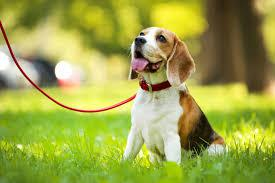

1



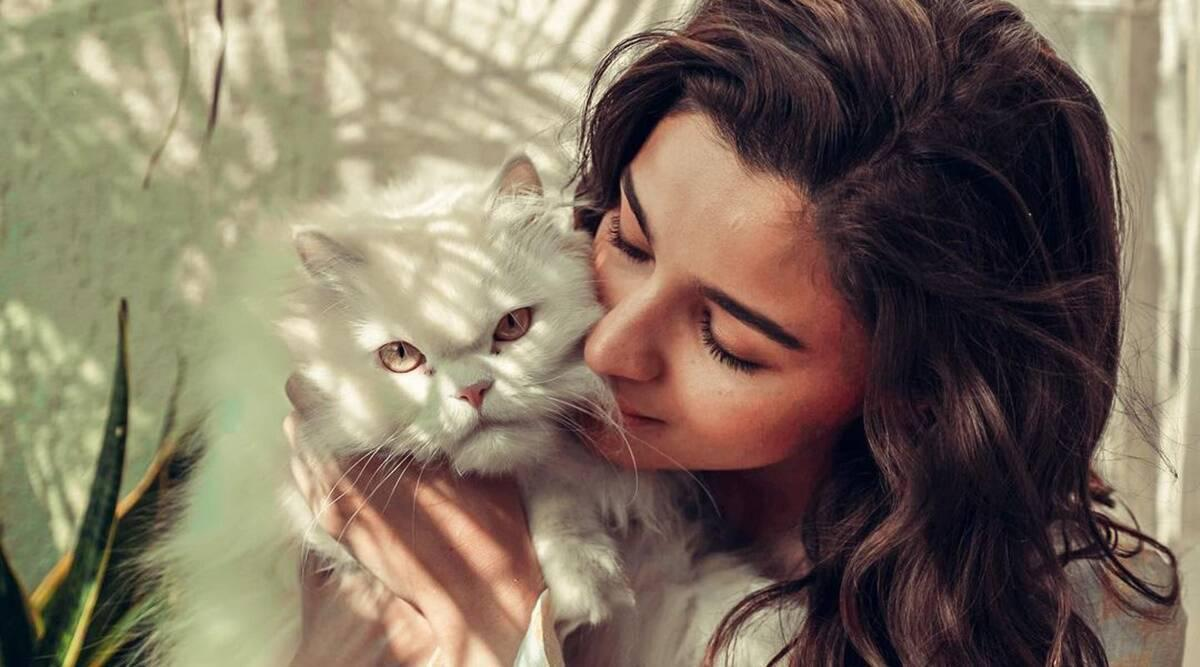

0



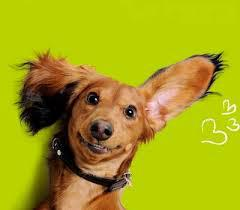

1



In [10]:
for image, label in zip(X_train[70:73], y_train[70:73]):
  cv2_imshow(image)
  print(label)

  print()

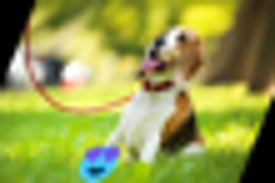

1



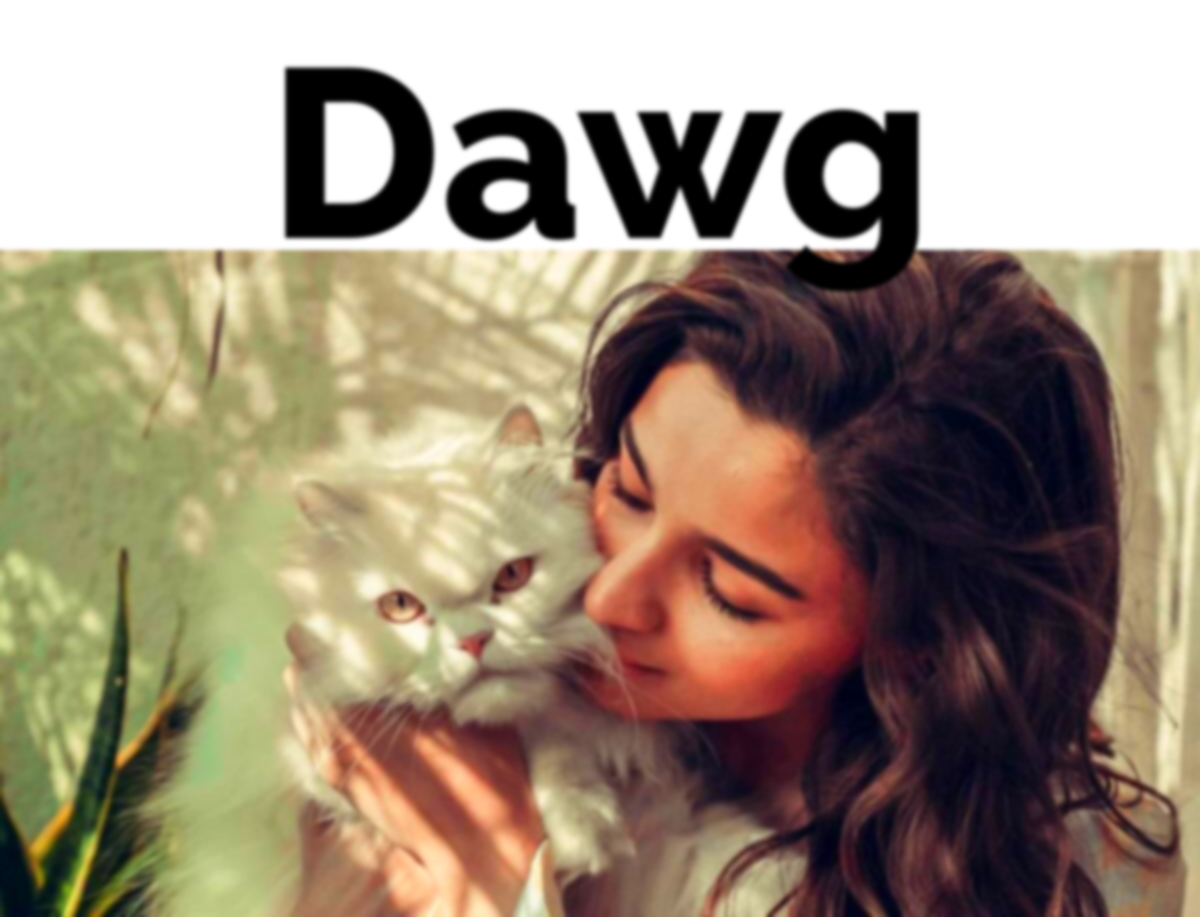

0



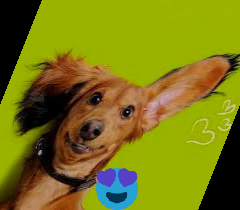

1



In [11]:
for image, label in zip(augmented_images_1[70:73], y_train[70:73]):
  cv2_imshow(image)
  print(label)

  print()

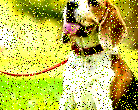

1



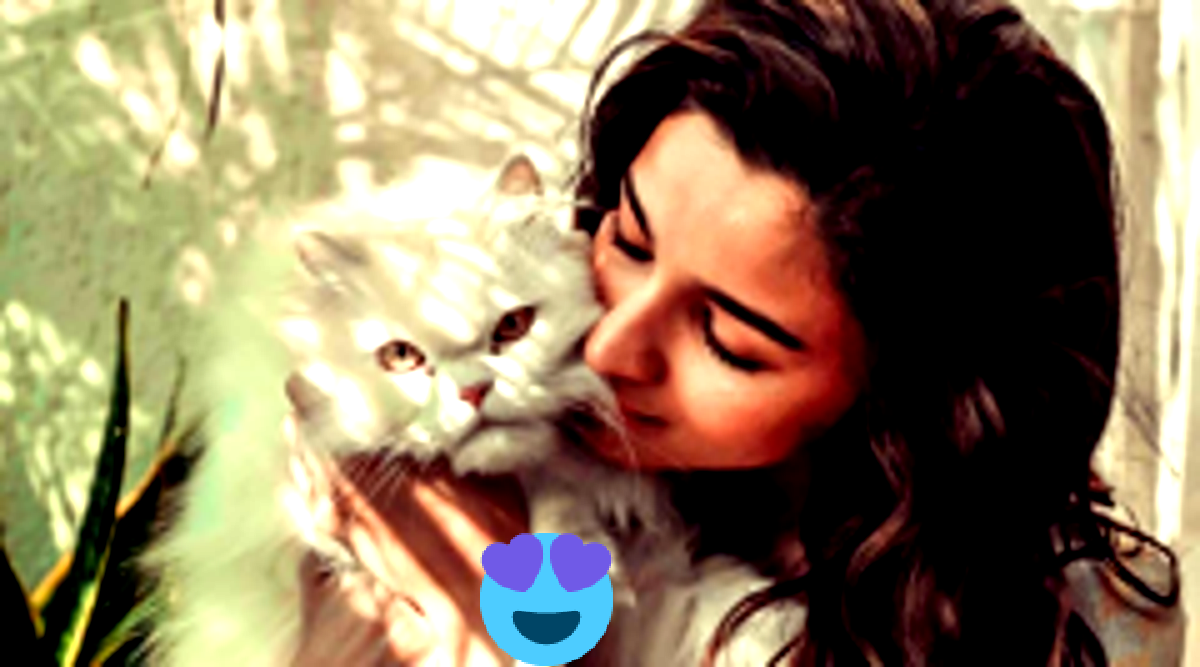

0



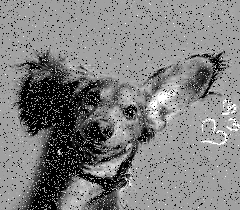

1



In [12]:
for image, label in zip(augmented_images_2[70:73], y_train[70:73]):
  cv2_imshow(image)
  print(label)

  print()

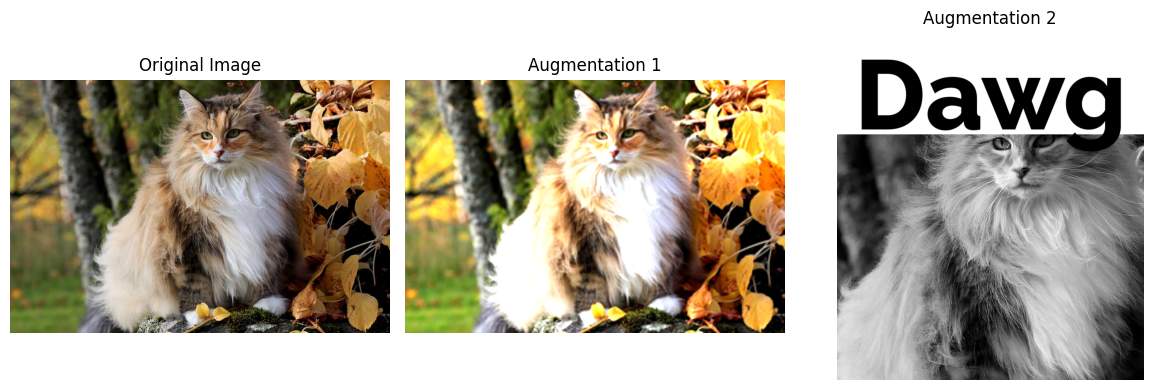

In [13]:
# Select an index to visualize
index = 0
def visualise(index):
  # Get the original image and two augmentations
  original_image = X_train[index]
  augmented_image_1 = augmented_images[index+0*112]
  augmented_image_2 = augmented_images[index+1*112]

  # Convert images from BGR to RGB if using OpenCV (cv2)
  original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
  augmented_image_1_rgb = cv2.cvtColor(augmented_image_1, cv2.COLOR_BGR2RGB)
  augmented_image_2_rgb = cv2.cvtColor(augmented_image_2, cv2.COLOR_BGR2RGB)

  # Create a matplotlib figure
  plt.figure(figsize=(12, 4))

  # Plot the original image
  plt.subplot(1, 3, 1)
  plt.imshow(original_image_rgb)
  plt.title("Original Image")
  plt.axis("off")

  # Plot the first augmented image
  plt.subplot(1, 3, 2)
  plt.imshow(augmented_image_1_rgb)
  plt.title("Augmentation 1")
  plt.axis("off")

  # Plot the second augmented image
  plt.subplot(1, 3, 3)
  plt.imshow(augmented_image_2_rgb)
  plt.title("Augmentation 2")
  plt.axis("off")

  # Display the figure
  plt.tight_layout()
  plt.show()

visualise(index)

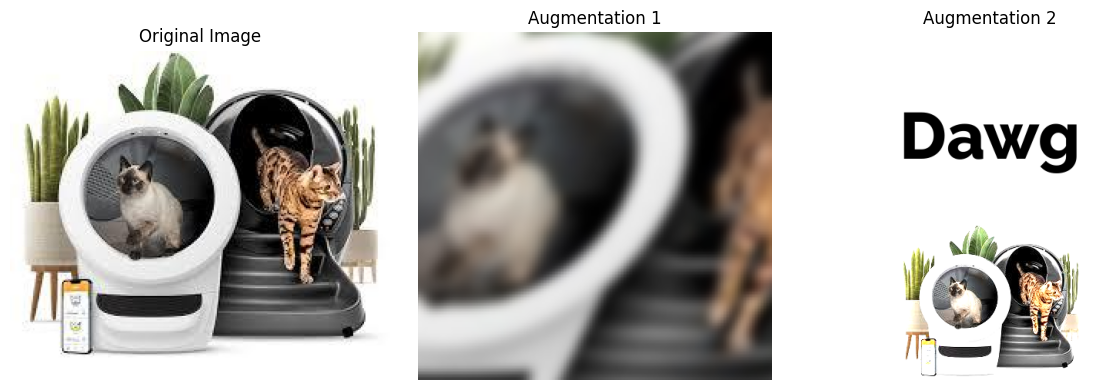

In [14]:
visualise(32)

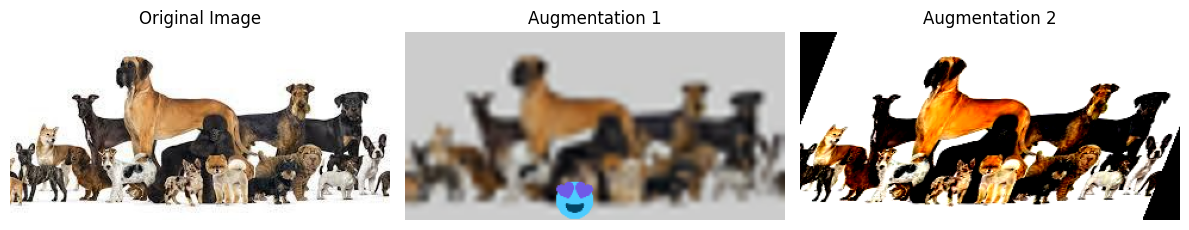

In [15]:
visualise(50)

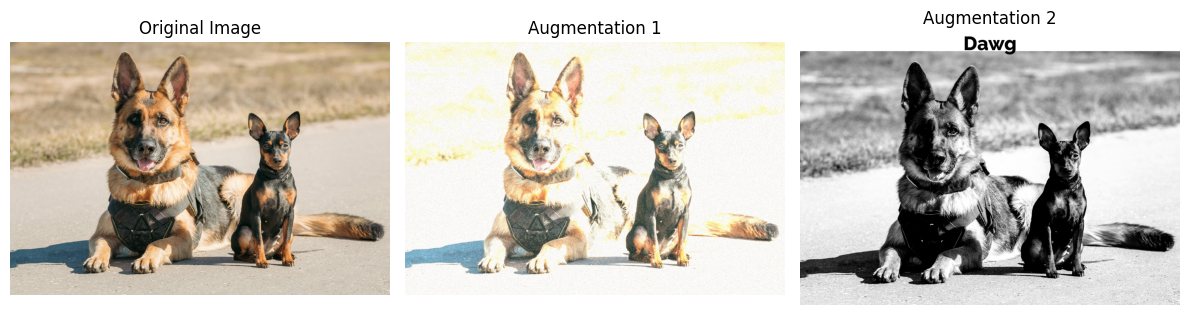

In [16]:
visualise(100)

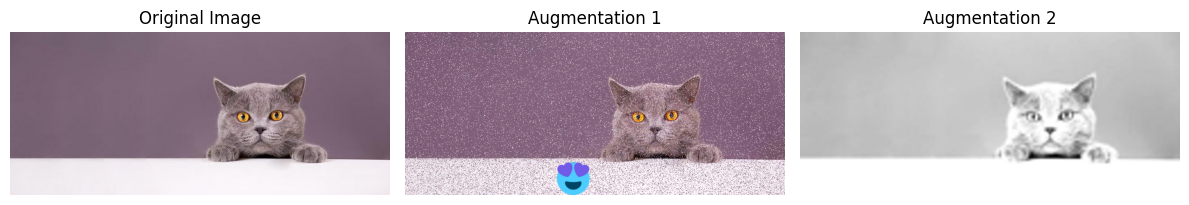

In [17]:
visualise(109)

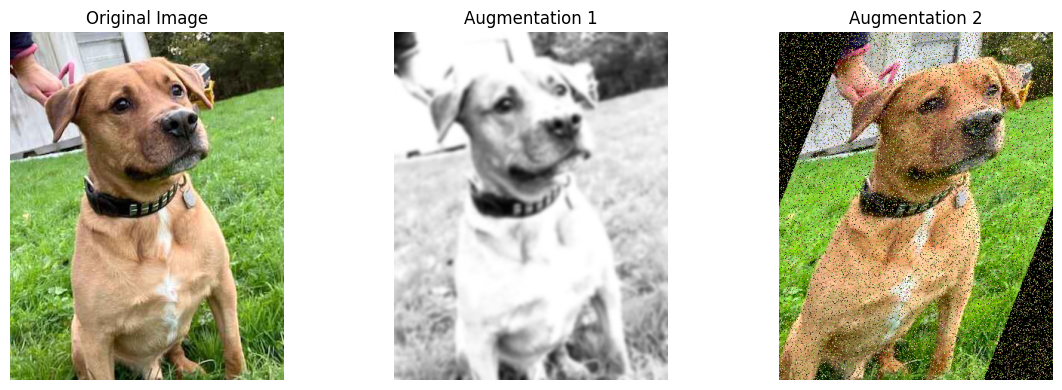

In [18]:
visualise(111)

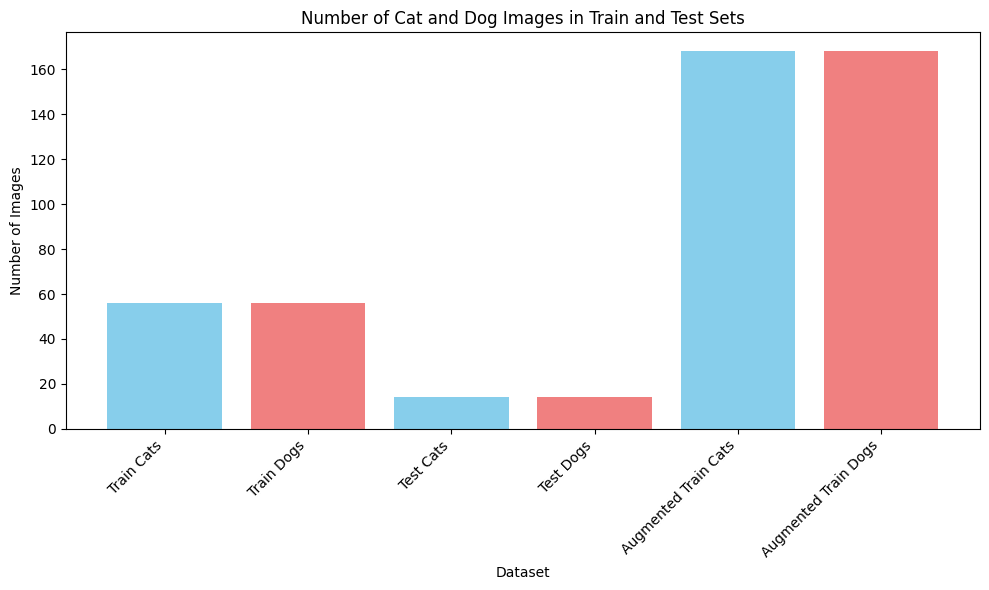

In [23]:
# Train & Test
# Augmented Train Set & Without Augmented Train Set
# Number of Cat & Dog Images in both a train set and a test set.

import matplotlib.pyplot as plt

# Count the number of cats and dogs in the original train and test sets
train_cats = sum(1 for label in y_train if label == 0)
train_dogs = sum(1 for label in y_train if label == 1)
test_cats = sum(1 for label in y_test if label == 0)
test_dogs = sum(1 for label in y_test if label == 1)

# Count the number of cats and dogs in the augmented train set
augmented_train_cats = sum(1 for label in augmented_labels if label == 0)
augmented_train_dogs = sum(1 for label in augmented_labels if label == 1)


# Create the bar graph
labels = ['Train Cats', 'Train Dogs', 'Test Cats', 'Test Dogs', 'Augmented Train Cats', 'Augmented Train Dogs']
counts = [train_cats, train_dogs, test_cats, test_dogs, augmented_train_cats, augmented_train_dogs]

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color=['skyblue', 'lightcoral', 'skyblue', 'lightcoral', 'skyblue', 'lightcoral'])
plt.title('Number of Cat and Dog Images in Train and Test Sets')
plt.xlabel('Dataset')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


We have a balanced dataset between the 2 classes

## Task 2: Model Training

*   Taking microsoft/resnet-50 from huggingface
*   Training on both the original train set and the augmented train set



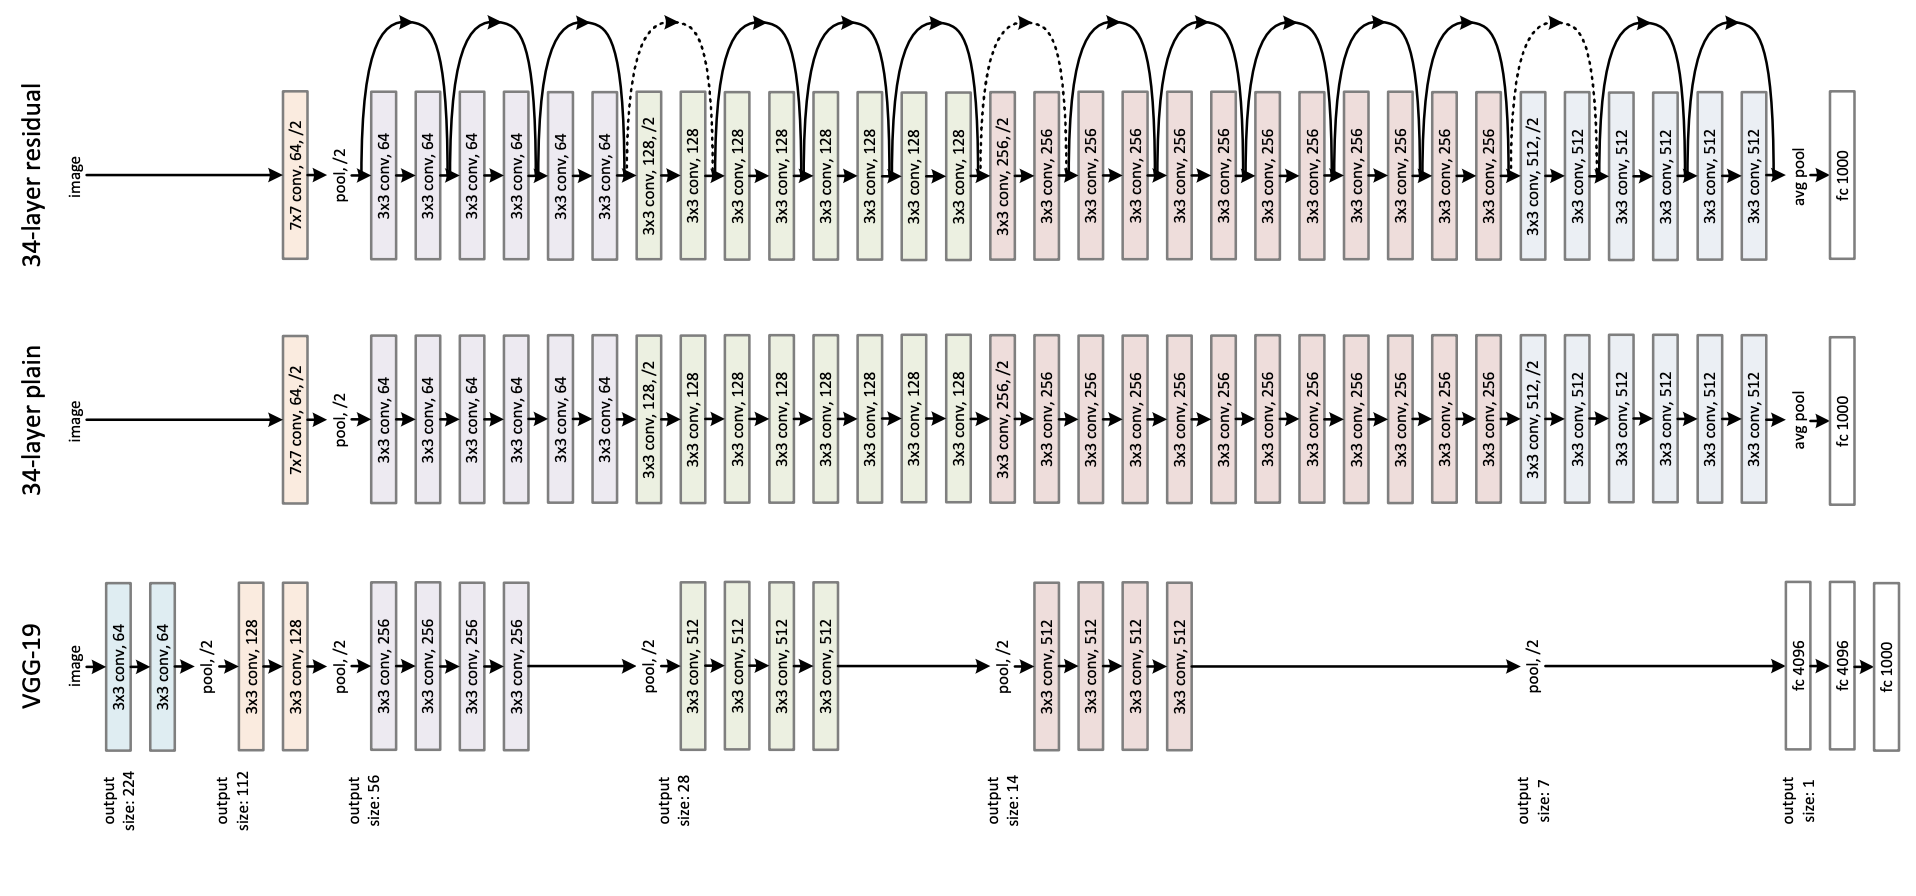

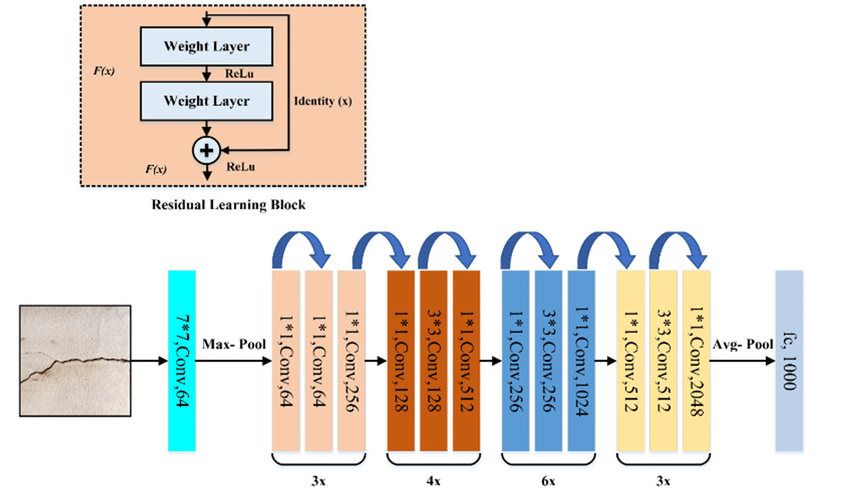

*Architecture Diagram of resnet-50*

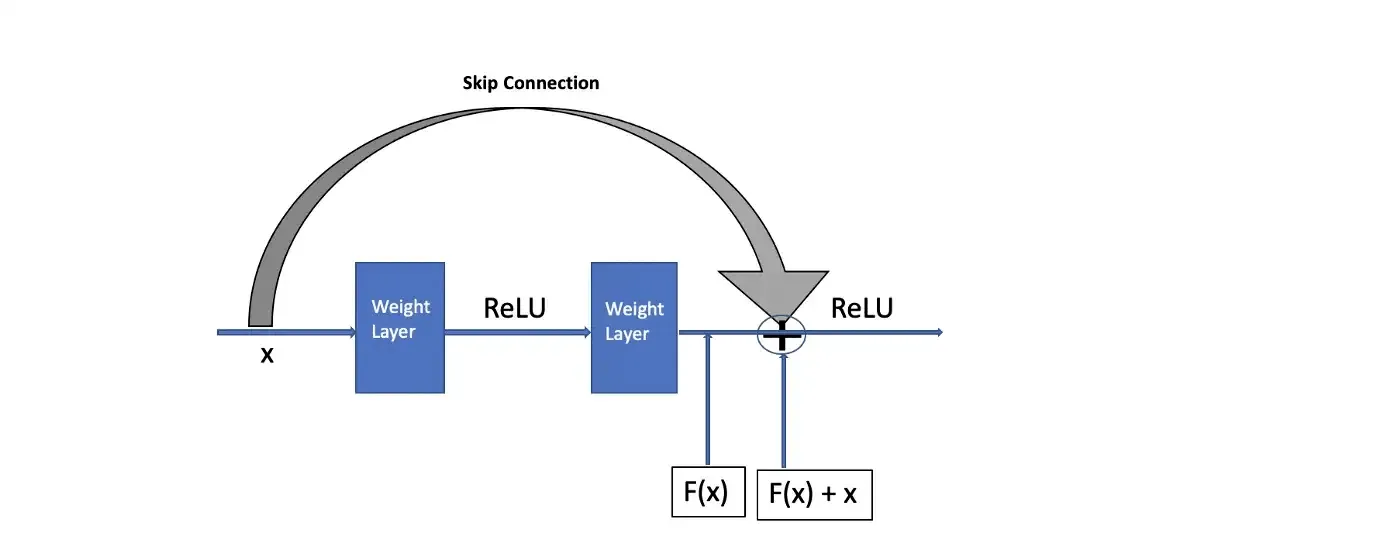

Skip connections, also known as residual connections, are a key feature of the ResNet50 architecture. They are used to allow the network to learn deeper architectures without suffering from the problem of vanishing gradients.

Vanishing gradients is a problem that occurs when training deep neural networks, where the gradients of the parameters in the deeper layers become very small, making it difficult for those layers to learn and improve. This problem becomes more pronounced as the network becomes deeper.

### *Note: Initial weights of the model should be the same when training with both datasets.*
### Choose (microsoft/resnet-50)model from the hugging face and initialize its new weights, we are changing the `fc` layer to a Linear layer with 2048 inputs and 2 outputs

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
from PIL import Image
import matplotlib.pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load ResNet-50 model
model_without_aug = models.resnet50(pretrained=True)
num_ftrs = model_without_aug.fc.in_features
model_without_aug.fc = nn.Linear(num_ftrs, 2)  # Assuming binary classification (cats/dogs)

model_with_aug = models.resnet50(pretrained=True)
model_with_aug.fc = nn.Linear(num_ftrs, 2)
model_with_aug = model_with_aug.to(device)

# Print model to verify changes
print(model_without_aug)

ModuleNotFoundError: No module named 'torchvision'

### Define training parameters


In [61]:
batch_size = 32
learning_rate = 0.001
epochs = 10
model_without_aug = model_without_aug.to(device)
model_with_aug = model_with_aug.to(device)

Epoch 1/10
  Train Loss (No Aug): 0.4759, Train Acc: 0.7232
  Train Loss (With Aug): 0.6122, Train Acc: 0.7076
  Test Loss (No Aug): 31.6771, Test Acc: 0.5714
  Test Loss (With Aug): 21.1937, Test Acc: 0.6429

Epoch 2/10
  Train Loss (No Aug): 0.6536, Train Acc: 0.8482
  Train Loss (With Aug): 0.3971, Train Acc: 0.8214
  Test Loss (No Aug): 476.5522, Test Acc: 0.5000
  Test Loss (With Aug): 4.9019, Test Acc: 0.6071

Epoch 3/10
  Train Loss (No Aug): 0.9575, Train Acc: 0.8125
  Train Loss (With Aug): 0.2950, Train Acc: 0.8661
  Test Loss (No Aug): 37.6439, Test Acc: 0.5000
  Test Loss (With Aug): 0.6842, Test Acc: 0.7500

Epoch 4/10
  Train Loss (No Aug): 0.3746, Train Acc: 0.8393
  Train Loss (With Aug): 0.1782, Train Acc: 0.9330
  Test Loss (No Aug): 13.0439, Test Acc: 0.5000
  Test Loss (With Aug): 1.4461, Test Acc: 0.7857

Epoch 5/10
  Train Loss (No Aug): 0.2728, Train Acc: 0.9107
  Train Loss (With Aug): 0.1444, Train Acc: 0.9353
  Test Loss (No Aug): 6.5395, Test Acc: 0.5000
  Te

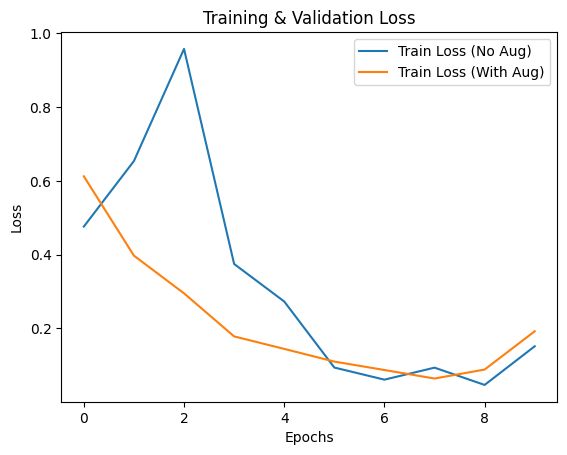

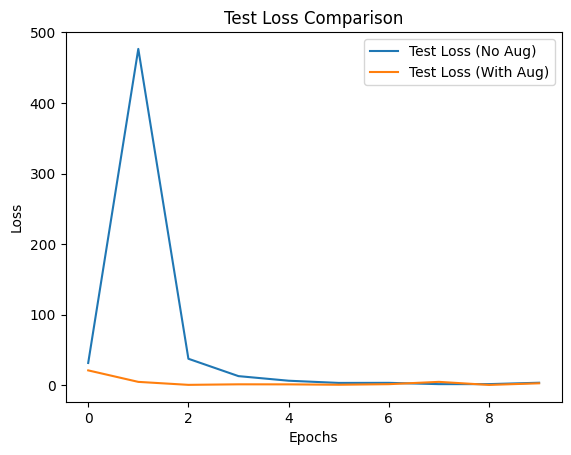

In [52]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer_without_aug = optim.Adam(model_without_aug.parameters(), lr=learning_rate)
optimizer_with_aug = optim.Adam(model_with_aug.parameters(), lr=learning_rate)

# Transform dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize all images to 224x224
    transforms.ToTensor()  # Convert to tensor
])

X_train_resized = [transform(Image.fromarray(image)) for image in X_train]
X_train_tensor = torch.stack(X_train_resized)
X_test_resized = [transform(Image.fromarray(image)) for image in X_test]
X_test_tensor = torch.stack(X_test_resized)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

X_aug_resized = [transform(Image.fromarray(image)) for image in augmented_images]
X_aug_tensor = torch.stack(X_aug_resized)
y_aug_tensor = torch.tensor(augmented_labels, dtype=torch.long)

# Create separate datasets for training without augmentation
train_dataset_without_aug = TensorDataset(X_train_tensor, y_train_tensor)
train_loader_without_aug = DataLoader(train_dataset_without_aug, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Create datasets for training with augmentation
X_train_final = torch.cat([X_train_tensor, X_aug_tensor])
y_train_final = torch.cat([y_train_tensor, y_aug_tensor])
train_dataset_with_aug = TensorDataset(X_train_final, y_train_final)
train_loader_with_aug = DataLoader(train_dataset_with_aug, batch_size=batch_size, shuffle=True)


# Training function
def train_model(model, train_loader, optimizer):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    return running_loss / len(train_loader), correct / total  # Avg loss & accuracy

# Lists to store losses
train_losses_without_aug, train_losses_with_aug = [], []
test_losses_without_aug, test_losses_with_aug = [], []

for epoch in range(epochs):
    # Train model WITHOUT augmentation
    train_loss_wo, train_acc_wo = train_model(model_without_aug, train_loader_without_aug, optimizer_without_aug)
    train_losses_without_aug.append(train_loss_wo)

    # Train model WITH augmentation
    train_loss_w, train_acc_w = train_model(model_with_aug, train_loader_with_aug, optimizer_with_aug)
    train_losses_with_aug.append(train_loss_w)

    # Evaluate model WITHOUT augmentation
    model_without_aug.eval()
    test_loss_wo, correct_wo, total_wo = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_without_aug(images)
            loss = criterion(outputs, labels)
            test_loss_wo += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_wo += labels.size(0)
            correct_wo += (predicted == labels).sum().item()
    test_losses_without_aug.append(test_loss_wo / len(test_loader))
    test_acc_wo = correct_wo / total_wo

    # Evaluate model WITH augmentation
    model_with_aug.eval()
    test_loss_w, correct_w, total_w = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_with_aug(images)
            loss = criterion(outputs, labels)
            test_loss_w += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_w += labels.size(0)
            correct_w += (predicted == labels).sum().item()
    test_losses_with_aug.append(test_loss_w / len(test_loader))
    test_acc_w = correct_w / total_w

    # Print results
    print(f"Epoch {epoch+1}/{epochs}")
    print(f"  Train Loss (No Aug): {train_loss_wo:.4f}, Train Acc: {train_acc_wo:.4f}")
    print(f"  Train Loss (With Aug): {train_loss_w:.4f}, Train Acc: {train_acc_w:.4f}")
    print(f"  Test Loss (No Aug): {test_losses_without_aug[-1]:.4f}, Test Acc: {test_acc_wo:.4f}")
    print(f"  Test Loss (With Aug): {test_losses_with_aug[-1]:.4f}, Test Acc: {test_acc_w:.4f}\n")




# Plot training and validation loss
plt.plot(range(epochs), train_losses_without_aug, label='Train Loss (No Aug)')
plt.plot(range(epochs), train_losses_with_aug, label='Train Loss (With Aug)')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.show()


plt.plot(range(epochs), test_losses_without_aug, label='Test Loss (No Aug)')
plt.plot(range(epochs), test_losses_with_aug, label='Test Loss (With Aug)')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Test Loss Comparison')
plt.show()

In [53]:
# Compute evaluation metrics manually
def calculate_metrics(model, dataloader):
    TP, FP, FN, TN = 0, 0, 0, 0
    model.eval()
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            for pred, true in zip(preds, labels):
                if pred == 1 and true == 1:
                    TP += 1
                elif pred == 1 and true == 0:
                    FP += 1
                elif pred == 0 and true == 1:
                    FN += 1
                else:
                    TN += 1
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = (TP + TN) / (TP + FP + FN + TN)
    return accuracy, precision, recall, f1_score

accuracy_wo, precision_wo, recall_wo, f1_score_wo = calculate_metrics(model_without_aug, test_loader)
accuracy_w, precision_w, recall_w, f1_score_w = calculate_metrics(model_with_aug, test_loader)
print(f"Final Accuracy (No Aug): {accuracy_wo:.4f}, Precision: {precision_wo:.4f}, Recall: {recall_wo:.4f}, F1 Score: {f1_score_wo:.4f}")
print(f"Final Accuracy (With Aug): {accuracy_w:.4f}, Precision: {precision_w:.4f}, Recall: {recall_w:.4f}, F1 Score: {f1_score_w:.4f}")

Final Accuracy (No Aug): 0.5714, Precision: 0.5417, Recall: 0.9286, F1 Score: 0.6842
Final Accuracy (With Aug): 0.5000, Precision: 0.5000, Recall: 0.7143, F1 Score: 0.5882


Now, freezing all layers except the last `fc` layer

Epoch 1/10
  Train Loss (No Aug): 0.7745, Train Acc: 0.4732
  Train Loss (With Aug): 0.5362, Train Acc: 0.7054
  Test Loss (No Aug): 0.6192, Test Acc: 0.5357
  Test Loss (With Aug): 0.3398, Test Acc: 0.8214

Epoch 2/10
  Train Loss (No Aug): 0.6204, Train Acc: 0.5804
  Train Loss (With Aug): 0.3071, Train Acc: 0.8973
  Test Loss (No Aug): 0.4455, Test Acc: 0.8571
  Test Loss (With Aug): 0.2451, Test Acc: 0.9286

Epoch 3/10
  Train Loss (No Aug): 0.4565, Train Acc: 0.8661
  Train Loss (With Aug): 0.2442, Train Acc: 0.9241
  Test Loss (No Aug): 0.3255, Test Acc: 1.0000
  Test Loss (With Aug): 0.1733, Test Acc: 0.9286

Epoch 4/10
  Train Loss (No Aug): 0.3518, Train Acc: 0.9107
  Train Loss (With Aug): 0.2279, Train Acc: 0.9330
  Test Loss (No Aug): 0.3661, Test Acc: 0.8929
  Test Loss (With Aug): 0.1469, Test Acc: 0.9643

Epoch 5/10
  Train Loss (No Aug): 0.3013, Train Acc: 0.9375
  Train Loss (With Aug): 0.1807, Train Acc: 0.9330
  Test Loss (No Aug): 0.2590, Test Acc: 0.9643
  Test Los

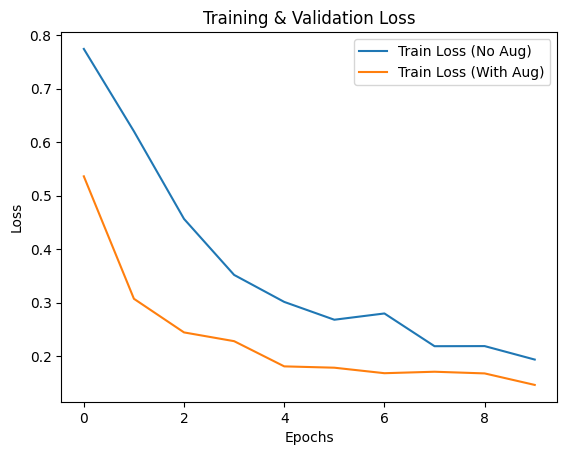

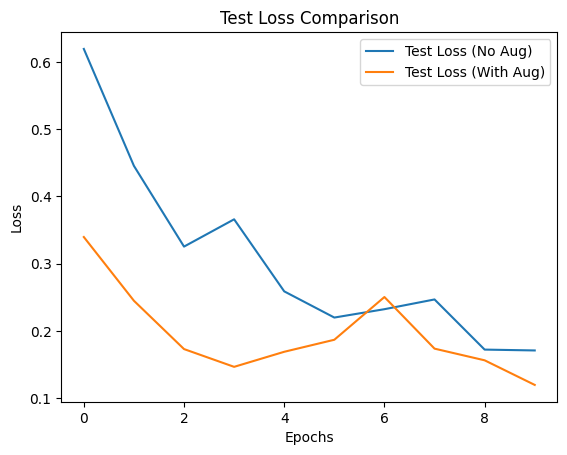

In [60]:
# Load ResNet-50 model
model_without_aug = models.resnet50(pretrained=True)
num_ftrs = model_without_aug.fc.in_features
# Freeze all layers except the last FC layer
for param in model_without_aug.parameters():
    param.requires_grad = False  # Freeze all layers
model_without_aug.fc = nn.Linear(num_ftrs, 2)  # Assuming binary classification (cats/dogs)
model_without_aug = model_without_aug.to(device)

model_with_aug = models.resnet50(pretrained=True)
num_ftrs = model_with_aug.fc.in_features
for param in model_with_aug.parameters():
    param.requires_grad = True  # Unfreeze all layers
model_with_aug.fc = nn.Linear(num_ftrs, 2)
model_with_aug = model_with_aug.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer_without_aug = optim.Adam(model_without_aug.fc.parameters(), lr=learning_rate)
optimizer_with_aug = optim.Adam(model_with_aug.fc.parameters(), lr=learning_rate)

# Transform dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize all images to 224x224
    transforms.ToTensor()  # Convert to tensor
])

X_train_resized = [transform(Image.fromarray(image)) for image in X_train]
X_train_tensor = torch.stack(X_train_resized)
X_test_resized = [transform(Image.fromarray(image)) for image in X_test]
X_test_tensor = torch.stack(X_test_resized)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

X_aug_resized = [transform(Image.fromarray(image)) for image in augmented_images]
X_aug_tensor = torch.stack(X_aug_resized)
y_aug_tensor = torch.tensor(augmented_labels, dtype=torch.long)

# Create separate datasets for training without augmentation
train_dataset_without_aug = TensorDataset(X_train_tensor, y_train_tensor)
train_loader_without_aug = DataLoader(train_dataset_without_aug, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Create datasets for training with augmentation
X_train_final = torch.cat([X_train_tensor, X_aug_tensor])
y_train_final = torch.cat([y_train_tensor, y_aug_tensor])
train_dataset_with_aug = TensorDataset(X_train_final, y_train_final)
train_loader_with_aug = DataLoader(train_dataset_with_aug, batch_size=batch_size, shuffle=True)


# Training function
def train_model(model, train_loader, optimizer):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    return running_loss / len(train_loader), correct / total  # Avg loss & accuracy

# Lists to store losses
train_losses_without_aug, train_losses_with_aug = [], []
test_losses_without_aug, test_losses_with_aug = [], []

for epoch in range(epochs):
    # Train model WITHOUT augmentation
    train_loss_wo, train_acc_wo = train_model(model_without_aug, train_loader_without_aug, optimizer_without_aug)
    train_losses_without_aug.append(train_loss_wo)

    # Train model WITH augmentation
    train_loss_w, train_acc_w = train_model(model_with_aug, train_loader_with_aug, optimizer_with_aug)
    train_losses_with_aug.append(train_loss_w)

    # Evaluate model WITHOUT augmentation
    model_without_aug.eval()
    test_loss_wo, correct_wo, total_wo = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_without_aug(images)
            loss = criterion(outputs, labels)
            test_loss_wo += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_wo += labels.size(0)
            correct_wo += (predicted == labels).sum().item()
    test_losses_without_aug.append(test_loss_wo / len(test_loader))
    test_acc_wo = correct_wo / total_wo

    # Evaluate model WITH augmentation
    model_with_aug.eval()
    test_loss_w, correct_w, total_w = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_with_aug(images)
            loss = criterion(outputs, labels)
            test_loss_w += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_w += labels.size(0)
            correct_w += (predicted == labels).sum().item()
    test_losses_with_aug.append(test_loss_w / len(test_loader))
    test_acc_w = correct_w / total_w

    # Print results
    print(f"Epoch {epoch+1}/{epochs}")
    print(f"  Train Loss (No Aug): {train_loss_wo:.4f}, Train Acc: {train_acc_wo:.4f}")
    print(f"  Train Loss (With Aug): {train_loss_w:.4f}, Train Acc: {train_acc_w:.4f}")
    print(f"  Test Loss (No Aug): {test_losses_without_aug[-1]:.4f}, Test Acc: {test_acc_wo:.4f}")
    print(f"  Test Loss (With Aug): {test_losses_with_aug[-1]:.4f}, Test Acc: {test_acc_w:.4f}\n")




# Plot training and validation loss
plt.plot(range(epochs), train_losses_without_aug, label='Train Loss (No Aug)')
plt.plot(range(epochs), train_losses_with_aug, label='Train Loss (With Aug)')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.show()


plt.plot(range(epochs), test_losses_without_aug, label='Test Loss (No Aug)')
plt.plot(range(epochs), test_losses_with_aug, label='Test Loss (With Aug)')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Test Loss Comparison')
plt.show()

In [62]:
# Compute evaluation metrics manually
def calculate_metrics(model, dataloader):
    TP, FP, FN, TN = 0, 0, 0, 0
    model.eval()
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            for pred, true in zip(preds, labels):
                if pred == 1 and true == 1:
                    TP += 1
                elif pred == 1 and true == 0:
                    FP += 1
                elif pred == 0 and true == 1:
                    FN += 1
                else:
                    TN += 1
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = (TP + TN) / (TP + FP + FN + TN)
    return accuracy, precision, recall, f1_score

accuracy_wo, precision_wo, recall_wo, f1_score_wo = calculate_metrics(model_without_aug, test_loader)
accuracy_w, precision_w, recall_w, f1_score_w = calculate_metrics(model_with_aug, test_loader)
print(f"Final Accuracy (No Aug): {accuracy_wo:.4f}, Precision: {precision_wo:.4f}, Recall: {recall_wo:.4f}, F1 Score: {f1_score_wo:.4f}")
print(f"Final Accuracy (With Aug): {accuracy_w:.4f}, Precision: {precision_w:.4f}, Recall: {recall_w:.4f}, F1 Score: {f1_score_w:.4f}")

Final Accuracy (No Aug): 0.9286, Precision: 1.0000, Recall: 0.8571, F1 Score: 0.9231
Final Accuracy (With Aug): 0.9643, Precision: 1.0000, Recall: 0.9286, F1 Score: 0.9630


For trainign the whole model

With Augmentation | Without Augmentation
---|---
0.5000 | 0.5714

For trainign only the `fc` layer of model

With Augmentation | Without Augmentation
---|---
 0.9643 | 0.9286

 Hence we can see that training just he last layer (classifier) results in good fine tuning of the ResNet50 model on our dataset, and benefits with Data Augmentation as well.

 In the case where we trained the whole model, since we are pausing abruptly at 10 epochs without waiting for it to converge, the performance is very low and doesnt benefit from data augmentation